**Vamos experimentar agora a Rede Neural Artificial?**
Veja:
https://scikit-learn.org/stable/modules/neural_networks_supervised.html# 

In [43]:
!pip3 -q install yellowbrick
!pip3 -q install imblearn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip3 install --upgrade pip


In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import numpy as np
from scipy import stats
from yellowbrick.classifier import ConfusionMatrix
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read and separate data

In [66]:
data = pd.read_csv("breast-cancer.csv")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no
1,50-59,ge40,15-19,0-2,no,1,right,central,no
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no
...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no


### Pre-processing

In [67]:
# Handling outliers using Z-score
z_score = np.abs(stats.zscore(X.select_dtypes(include=[np.number])))
outlier_rows = np.where(z_score > 3)[0]
X = X.drop(outlier_rows)
y = y.drop(outlier_rows)

In [68]:
# Preprocess categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numeric_features = X.select_dtypes(include=[np.number]).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X = preprocessor.fit_transform(X)


In [69]:
# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

### Split data

In [72]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

**Vamos treinar com a rede neural?**

**Experimente a RNA com os parâmetros default. A rede convergiu? quantas épocas?**

In [74]:
#modelo = MLPClassifier()
modelo = MLPClassifier(max_iter=1000, verbose=True, tol=0.00001, solver = 'adam', activation = 'relu',hidden_layer_sizes = (3, 2, 1))
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.72828365
Iteration 2, loss = 0.72588065
Iteration 3, loss = 0.72372861
Iteration 4, loss = 0.72154893
Iteration 5, loss = 0.71975038
Iteration 6, loss = 0.71796308
Iteration 7, loss = 0.71656065
Iteration 8, loss = 0.71481985
Iteration 9, loss = 0.71357833
Iteration 10, loss = 0.71245672
Iteration 11, loss = 0.71171496
Iteration 12, loss = 0.71096508
Iteration 13, loss = 0.71012210
Iteration 14, loss = 0.70953295
Iteration 15, loss = 0.70884807
Iteration 16, loss = 0.70826867
Iteration 17, loss = 0.70769039
Iteration 18, loss = 0.70710656
Iteration 19, loss = 0.70661326
Iteration 20, loss = 0.70606049
Iteration 21, loss = 0.70557587
Iteration 22, loss = 0.70498054
Iteration 23, loss = 0.70444834
Iteration 24, loss = 0.70394739
Iteration 25, loss = 0.70340703
Iteration 26, loss = 0.70291719
Iteration 27, loss = 0.70239775
Iteration 28, loss = 0.70188644
Iteration 29, loss = 0.70139159
Iteration 30, loss = 0.70086240
Iteration 31, loss = 0.70042313
Iteration 32, los

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 2, 1), max_iter=1000, tol=1e-05,
              verbose=True)

**Depois execute novamente com os ajustes. Veja agora os erros a cada época.. estabeleça o verbose para true **

In [ ]:
modelo = MLPClassifier(max_iter=1000, verbose=True)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.72818496
Iteration 2, loss = 0.69598631
Iteration 3, loss = 0.66825764
Iteration 4, loss = 0.64539323
Iteration 5, loss = 0.62597860
Iteration 6, loss = 0.60953516
Iteration 7, loss = 0.59574679
Iteration 8, loss = 0.58481498
Iteration 9, loss = 0.57623941
Iteration 10, loss = 0.56800979
Iteration 11, loss = 0.56198147
Iteration 12, loss = 0.55671190
Iteration 13, loss = 0.55231047
Iteration 14, loss = 0.54817643
Iteration 15, loss = 0.54441508
Iteration 16, loss = 0.54039756
Iteration 17, loss = 0.53656374
Iteration 18, loss = 0.53268038
Iteration 19, loss = 0.52909724
Iteration 20, loss = 0.52533059
Iteration 21, loss = 0.52215972
Iteration 22, loss = 0.51884408
Iteration 23, loss = 0.51551125
Iteration 24, loss = 0.51231253
Iteration 25, loss = 0.50909862
Iteration 26, loss = 0.50587870
Iteration 27, loss = 0.50268818
Iteration 28, loss = 0.50018347
Iteration 29, loss = 0.49705312
Iteration 30, loss = 0.49448681
Iteration 31, loss = 0.49221054
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)

**Faça outras alterações nos parâmetros**

**4 entradas - 3 neurônios - 3 neurônios - 1**

**Veja SoftMax para problemas multiclasse**

In [ ]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.00000000000001, solver = 'adam', activation = 'relu', hidden_layer_sizes = 9)
modelo.fit(X_treino, y_treino)

Iteration 1, loss = 0.72306035
Iteration 2, loss = 0.69633308
Iteration 3, loss = 0.67320514
Iteration 4, loss = 0.65343187
Iteration 5, loss = 0.63608752
Iteration 6, loss = 0.62157027
Iteration 7, loss = 0.60919457
Iteration 8, loss = 0.59918153
Iteration 9, loss = 0.58984938
Iteration 10, loss = 0.58222365
Iteration 11, loss = 0.57624203
Iteration 12, loss = 0.57043246
Iteration 13, loss = 0.56483057
Iteration 14, loss = 0.56047715
Iteration 15, loss = 0.55570116
Iteration 16, loss = 0.55150399
Iteration 17, loss = 0.54718731
Iteration 18, loss = 0.54324718
Iteration 19, loss = 0.53924800
Iteration 20, loss = 0.53531778
Iteration 21, loss = 0.53172883
Iteration 22, loss = 0.52814964
Iteration 23, loss = 0.52485392
Iteration 24, loss = 0.52152478
Iteration 25, loss = 0.51828858
Iteration 26, loss = 0.51524400
Iteration 27, loss = 0.51197622
Iteration 28, loss = 0.50893082
Iteration 29, loss = 0.50604187
Iteration 30, loss = 0.50335033
Iteration 31, loss = 0.50056205
Iteration 32, los

MLPClassifier(max_iter=1000, verbose=True)



> **Vamos testar o modelo?**



In [75]:
previsoes = modelo.predict(X_teste)

In [76]:
previsoes

array(['recurrence-events', 'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'no-recurrence-events', 'no-recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'recurrence-events', 'no-recurrence-events', 'recurrence-events',
       'recurrence-events', 'recurrence-events', 'recurrence-events',
       'no-recurrence-events', 'recurrence-events',
      



> **Será se o modelo acertou?**



In [77]:
y_teste

285    no-recurrence-events
281    no-recurrence-events
33     no-recurrence-events
211       recurrence-events
93     no-recurrence-events
               ...         
228    no-recurrence-events
371       recurrence-events
176    no-recurrence-events
272    no-recurrence-events
3      no-recurrence-events
Name: Class, Length: 81, dtype: object

In [79]:

accuracy_score(y_teste,previsoes)

0.6790123456790124

In [80]:
confusion_matrix(y_teste, previsoes)

array([[31, 16],
       [10, 24]])

0.6790123456790124

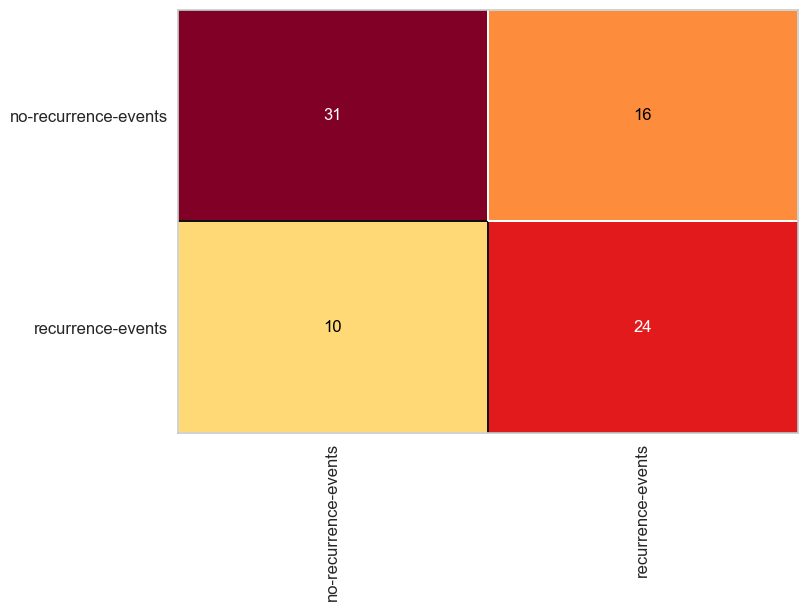

In [81]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [82]:
print(classification_report(y_teste, previsoes))

                      precision    recall  f1-score   support

no-recurrence-events       0.76      0.66      0.70        47
   recurrence-events       0.60      0.71      0.65        34

            accuracy                           0.68        81
           macro avg       0.68      0.68      0.68        81
        weighted avg       0.69      0.68      0.68        81



### hyperparameter tuning using GridSearchCV

In [85]:
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (10, 5), (20, 10), (30, 15)],
    'activation': ['relu', 'tanh', 'logistic'],
}

mlp = MLPClassifier(max_iter=1000, random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_treino, y_treino)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterat

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (10, 5),
                                                (20, 10), (30, 15)]},
             scoring='accuracy')

In [86]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (30,)}


In [87]:
best_model = grid_search.best_estimator_
best_model.fit(X_treino, y_treino)
predictions = best_model.predict(X_teste)

In [88]:

accuracy = accuracy_score(y_teste, predictions)
print("Accuracy of the best model:", accuracy)

Accuracy of the best model: 0.7654320987654321
